<a href="https://www.kaggle.com/code/dirgham/healthcare-staffing-and-sales-insights?scriptVersionId=222372023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sales Insights related to Healthcare staffing in the United States of America 

# Summary

This notebook identifies the high-priority sales for Nurse staff providers sales team by examining nurse staffing shortages (PBJ data) and Medicare enrolment growth. The machine learning models show that CNA hours are the major drivers of staffing levels, while dual-eligible beneficiaries strongly influence Medicare growth. States like Missouri, Tennessee, Ohio, Georgia, and Texas show high patient demand but low CNA Staffing, making them the main targets for expansion. Sales teams should prioritize these regions to address staffing shortages and capture market opportunities.  

# Importing the essential libraries

In [1]:
# For the data handling and preprocessing 
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt 
import seaborn as sns 


# Loading different datasets to carry out the exploratory data analysis

In [2]:
# Loading the monthly medicare enrollment data 
mme = pd.read_csv("/kaggle/input/monthly-medicare-enrollment/Medicare Monthly Enrollment/2024-09/Medicare Monthly Enrollment Data_September 2024.csv")

# Loading the daily nurse staffing for the Quarter 2 of the year 2024
pbj = pd.read_csv("/kaggle/input/pbj-2024-q2-data/PBJ_Daily_Nurse_Staffing_Q2_2024.csv", encoding = "ISO-8859-1", low_memory = False)

In [3]:
mme.head(5)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,862992.0,652965.0,210026.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,8742.0,5902.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,38651.0,26393.0,12258.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5515.0,4704.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


In [4]:
pbj.head(5)

,ï»¿PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2024Q2,20240401.0,51.0,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2024Q2,20240402.0,52.0,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2024Q2,20240403.0,53.0,11.13,...,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2024Q2,20240404.0,52.0,12.27,...,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2024Q2,20240405.0,52.0,4.95,...,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507029 entries, 0 to 507028
Data columns (total 54 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          507029 non-null  int64 
 1   MONTH                                         507029 non-null  object
 2   BENE_GEO_LVL                                  507029 non-null  object
 3   BENE_STATE_ABRVTN                             507029 non-null  object
 4   BENE_STATE_DESC                               507029 non-null  object
 5   BENE_COUNTY_DESC                              507029 non-null  object
 6   BENE_FIPS_CD                                  507029 non-null  object
 7   TOT_BENES                                     507029 non-null  object
 8   ORGNL_MDCR_BENES                              507029 non-null  object
 9   MA_AND_OTH_BENES                              507029 non-nu

In [6]:
pbj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325325 entries, 0 to 1325324
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ï»¿PROVNUM        1325325 non-null  object 
 1   PROVNAME          1325325 non-null  object 
 2   CITY              1325325 non-null  object 
 3   STATE             1325325 non-null  object 
 4   COUNTY_NAME       1325324 non-null  object 
 5   COUNTY_FIPS       1325324 non-null  float64
 6   CY_Qtr            1325324 non-null  object 
 7   WorkDate          1325324 non-null  float64
 8   MDScensus         1325324 non-null  float64
 9   Hrs_RNDON         1325324 non-null  float64
 10  Hrs_RNDON_emp     1325324 non-null  float64
 11  Hrs_RNDON_ctr     1325324 non-null  float64
 12  Hrs_RNadmin       1325324 non-null  float64
 13  Hrs_RNadmin_emp   1325324 non-null  float64
 14  Hrs_RNadmin_ctr   1325324 non-null  float64
 15  Hrs_RN            1325324 non-null  float64
 16  

* We can see from the above data on the columns that the data does not contain null values
* There are equal number of rows with the non-null data in both the datasets

# Understanding Monthly Enrollment Dataset (MME)

## **1️⃣ Medicare Monthly Enrollment Dataset (MME)**
📌 **Purpose:** Tracks Medicare enrollment by state, county, demographics, and type of Medicare coverage.  
📌 **How it helps:** Helps us analyze regions with rising Medicare enrollment → More demand for healthcare → More nurse staffing opportunities.  

### **Key Columns:**
- **YEAR, MONTH** → The year and month of the Medicare enrollment data.  
- **BENE_GEO_LVL** → The geographic level of the beneficiary (e.g., State, County).  
- **BENE_STATE_ABRVTN, BENE_STATE_DESC, BENE_COUNTY_DESC, BENE_FIPS_CD** → State and county details to analyze Medicare growth at a local level.  
- **TOT_BENES** → Total number of Medicare beneficiaries in each region. **(This is a key column for trend analysis!)**  
- **ORGNL_MDCR_BENES, MA_AND_OTH_BENES** → Number of beneficiaries under Original Medicare vs. Medicare Advantage.  
- **Demographics:**  
  - **AGED_TOT_BENES, DSBLD_TOT_BENES** → Number of elderly vs. disabled enrollees.  
  - **MALE_TOT_BENES, FEMALE_TOT_BENES** → Number of male vs. female beneficiaries.  
  - **WHITE_TOT_BENES, BLACK_TOT_BENES, API_TOT_BENES, HSPNC_TOT_BENES, NATIND_TOT_BENES, OTHR_TOT_BENES** → Racial distribution of Medicare enrollees.  
  - **AGE_LT_25_BENES to AGE_GT_94_BENES** → Medicare enrollees by age group.  
- **DUAL_TOT_BENES, FULL_DUAL_TOT_BENES, PART_DUAL_TOT_BENES, NODUAL_TOT_BENES** → Shows how many enrollees are also eligible for Medicaid (dual-eligible).  
- **PRSCRPTN_DRUG_TOT_BENES, PRSCRPTN_DRUG_PDP_BENES, PRSCRPTN_DRUG_MAPD_BENES** → Shows how many enrollees have prescription drug coverage.  

## **2️⃣ Payroll-Based Journal (PBJ) Daily Nurse Staffing Dataset**  
📌 **Purpose:** Tracks daily staffing levels of nurses (RNs, LPNs, CNAs) in nursing homes across the U.S.  
📌 **How it helps:** Helps us analyze **staffing shortages, hiring trends, and regional staffing demands.**  

### **Key Columns:**
- **PROVNUM, PROVNAME** → Unique provider number & name of the nursing facility.  
- **CITY, STATE, COUNTY_NAME, COUNTY_FIPS** → Geographic details of the facility (important for matching with the MME dataset).  
- **CY_Qtr, WorkDate** → The reporting quarter and specific work date of the staffing data.  
- **MDScensus** → Number of residents in the facility (useful for understanding patient-to-staff ratios).  
- **Hrs_RNDON, Hrs_LPN, Hrs_CNA, Hrs_MedAide, Hrs_NAtrn** → Total hours worked by different types of nurses:  
  - **Hrs_RNDON** → Registered Nurse Director of Nursing hours.  
  - **Hrs_RN** → Regular Registered Nurse hours.  
  - **Hrs_LPN** → Licensed Practical Nurse hours.  
  - **Hrs_CNA** → Certified Nursing Assistant hours.  
  - **Hrs_MedAide** → Medication Aide hours.  
  - **Hrs_NAtrn** → Nurse Aide Trainee hours.  
- **_emp vs. _ctr columns** (e.g., **Hrs_RN_emp, Hrs_RN_ctr**) → Breakdown of hours worked by **employees vs. contract nurses** (important for identifying staffing shortages).  


# Data Preparation and Preprocessing 

In [7]:
# Convert dates
pbj['WorkDate'] = pd.to_datetime(pbj['WorkDate'], errors='coerce')

# Convert numeric columns in Medicare Enrollment dataset
numeric_cols = ['TOT_BENES', 'ORGNL_MDCR_BENES','MA_AND_OTH_BENES']
mme[numeric_cols] = mme[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [8]:
# Check for duplicate rows in PBJ dataset
pbj_duplicates = pbj.duplicated().sum()
print(f"PBJ Dataset - Duplicate rows: {pbj_duplicates}")

# Chekc for duplicate rows in Medicare Monthly Enrollment dataset
mme_duplicates = mme.duplicated().sum()
print(f"Medicare Monthly Enrollment Dataset - Duplicate Rows: {mme_duplicates}")

PBJ Dataset - Duplicate rows: 0
Medicare Monthly Enrollment Dataset - Duplicate Rows: 0


As there no duplicate rows in the dataset, we can go ahead with the exploratory data analysis

# Medicare Enrollment Trends

In [9]:
# Identify states with the fastest-growing medicare enrollment
medicare_growth = mme.groupby("BENE_STATE_DESC")["TOT_BENES"].sum().reset_index()
# Remove the row where BENE_STATE_DESC is "National" as we need state-wise insights actually
medicare_growth = medicare_growth[medicare_growth["BENE_STATE_DESC"] != "National"]
top_states = medicare_growth.sort_values(by ="TOT_BENES", ascending=False).head(10)
print("\n Top 10 states with highest medicare enrollment:")
print(top_states)


 Top 10 states with highest medicare enrollment:
   BENE_STATE_DESC     TOT_BENES
5       California  1.864244e+09
10         Florida  1.354104e+09
49           Texas  1.233825e+09
36        New York  1.081332e+09
43    Pennsylvania  8.176491e+08
40            Ohio  6.987869e+08
16        Illinois  6.671079e+08
25        Michigan  6.165879e+08
37  North Carolina  5.906419e+08
12         Georgia  5.116432e+08


* We can see that the top 5 states with the highest medicare enrollment are California, Florida, Texas, Newyork and Pennsylvania
* Sales insight - These areas are the main targets for expanding the nurse staffing solutions. CBH can prioritize outreach to facilities in this state by increasing the staffing partnerships

# Contract Nurse Percentages

In [10]:
# Find facilities with high contract nurse usage (potential sales leads)
pbj["Contract_Nurse_Percentage"] = (
    (pbj["Hrs_RN_ctr"] + pbj["Hrs_LPN_ctr"] + pbj["Hrs_CNA_ctr"]) / 
    (pbj["Hrs_RN"] + pbj["Hrs_LPN"] + pbj["Hrs_CNA"]) 
) * 100
high_contract_usage = pbj[pbj["Contract_Nurse_Percentage"] > 50]
print("\nFacilities relying heavily on contract nurses:")
# Sort the DataFrame in descending order based on Contract_Nurse_Percentage
pbj_sorted = pbj.sort_values(by="Contract_Nurse_Percentage", ascending=False)


# Display the top facilities with the highest contract nurse usage
print(pbj_sorted[["PROVNAME", "STATE", "Contract_Nurse_Percentage"]].head(5))



Facilities relying heavily on contract nurses:
                                         PROVNAME STATE  \
143337       CURTIS HOME ST ELIZABETH CENTER, THE    CT   
669769                      BLACKFEET CARE CENTER    MT   
901411   ST LUKE LUTHERAN COMMUNITY-PORTAGE LAKES    OH   
826728        UNIVERSAL HEALTH CARE/FUQUAY-VARINA    NC   
1292213              SAN ANGELO NURSING AND REHAB    TX   

         Contract_Nurse_Percentage  
143337                       100.0  
669769                       100.0  
901411                       100.0  
826728                       100.0  
1292213                      100.0  


* We can see that the contract nurse percentage is the maximum in above facilities
* These facilities can be the prime sales target for the staffing solutions that CBH can provide

# Staffing Shortages

In [11]:
pbj["Staffing_Ratio"] = (pbj["Hrs_RN"] + pbj["Hrs_LPN"] + pbj["Hrs_CNA"]) / pbj["MDScensus"]
low_staffing = pbj[pbj["Staffing_Ratio"] < 2]

# Sort in descending order
low_staffing_sorted = low_staffing.sort_values(by="Staffing_Ratio", ascending=False)


print("\n Facilities with low staffing ratios: ")
print(low_staffing_sorted[["PROVNAME","STATE","Staffing_Ratio"]].head(10))


 Facilities with low staffing ratios: 
                                          PROVNAME STATE  Staffing_Ratio
1119314   SKYVIEW SPRINGS REHAB AND NURSING CENTER    VA        1.999908
1292507                    GRAPEVINE MEDICAL LODGE    TX        1.999884
1078225  AMISTAD NURSING AND REHABILITATION CENTER    TX        1.999881
42643                BEEBE RETIREMENT CENTER, INC.    AR        1.999880
228140          HARTWELL HEALTH AND REHABILITATION    GA        1.999878
643447     WARSAW HEALTH AND REHABILITATION CENTER    MO        1.999877
334860                 MAJESTIC CARE OF WEST ALLEN    IN        1.999877
1253894            WOODLAND SPRINGS NURSING CENTER    TX        1.999877
291648                               BALMORAL HOME    IL        1.999875
1179996                   MARQUARDT MEMORIAL MANOR    WI        1.999873


* Facilities with the low staffing ratio indicates the higher reliance on the contractual staff. 
* Above list suggests the facilities were CBH can assist to cater the contractual staffing needs

# Medicare Enrollment Growth by State

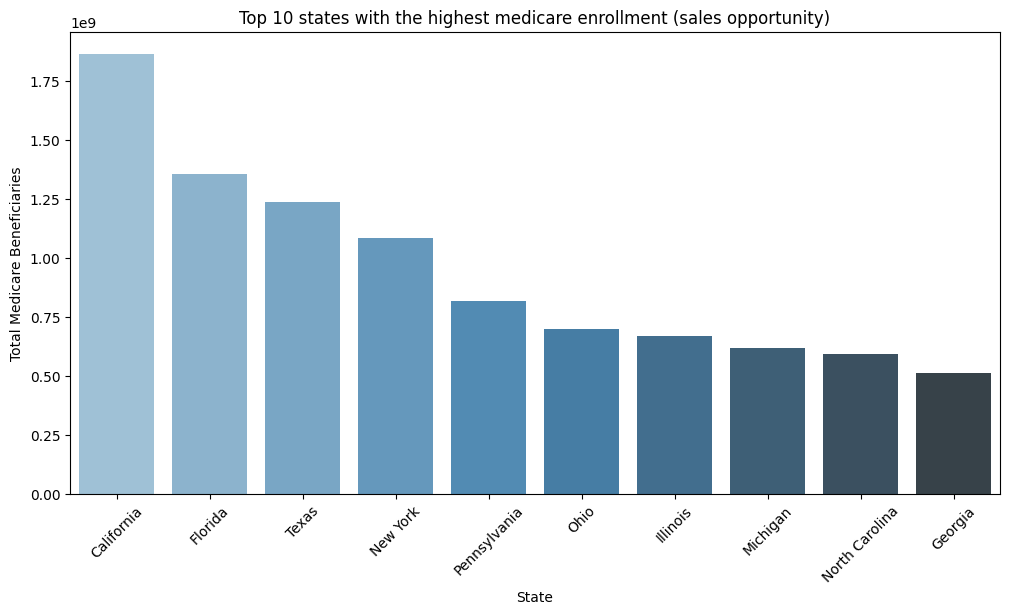

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x="BENE_STATE_DESC",  y="TOT_BENES", palette="Blues_d")
plt.xticks(rotation=45)

# Remove rows where STATE is "National"
pbj = pbj[pbj["STATE"] != "National"]

plt.title("Top 10 states with the highest medicare enrollment (sales opportunity)")
plt.ylabel("Total Medicare Beneficiaries")
plt.xlabel("State")
plt.show()

* States with the highest Medicare enrollment (e.g., California, Florida, Texas) indicate growing patient populations, leading to higher staffing demands at healthcare facilities.
* Sales teams can target these states to offer staffing solutions where demand is increasing.

# Facilities with the highest contract nurse usage

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


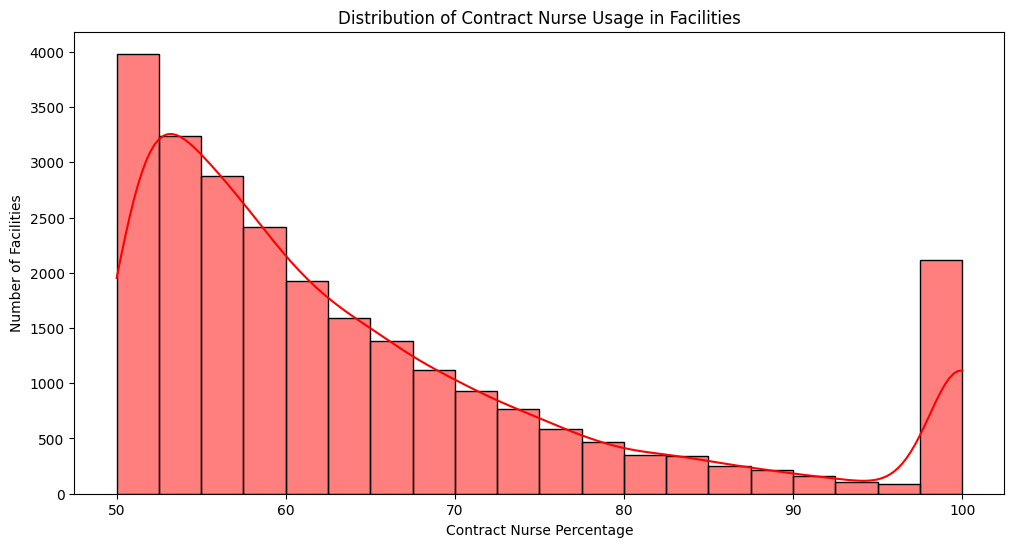

In [13]:
# Facilities with the highest contract nurse usage
plt.figure(figsize=(12,6))
sns.histplot(high_contract_usage["Contract_Nurse_Percentage"], bins=20, kde=True, color="red")
plt.title("Distribution of Contract Nurse Usage in Facilities")
plt.xlabel("Contract Nurse Percentage")
plt.ylabel("Number of Facilities")
plt.show()

### **Analysis of the Distribution of Contract Nurse Usage in Facilities**  

This histogram shows the **distribution of contract nurse usage** across healthcare facilities. Key takeaways:  

1️⃣ **Majority of Facilities Have 50%-70% Contract Nurse Usage:**  
   - The highest concentration of facilities falls within this range, indicating a **strong reliance on contract nurses**.  
   - This suggests that **many healthcare providers struggle with permanent staffing**, making them **potential customers** for staffing services.  

2️⃣ **Long-Tail Distribution Towards Higher Usage:**  
   - Some facilities have **80%-100% contract nurse dependency**, meaning **almost their entire workforce is outsourced**.  
   - These facilities **urgently need staffing solutions** and could be **high-value leads** for Clipboard Health.  

3️⃣ **Sales & Business Opportunities:**  
   - Facilities in the **60%+ range** may need **longer-term solutions**, such as **bulk contracts or subscription-based staffing services**.  
   - The **100% peak** suggests some facilities **fully rely on contract nurses**, making them **prime targets for premium services**.  

### **Actionable Insights for Sales Strategy**  
📌 **Prioritize outreach to facilities with 80%-100% contract nurse usage** – they are **highly dependent** and may be willing to **pay a premium** for reliable staffing.  
📌 **Develop retention strategies for facilities in the 50%-70% range** to convert them into **long-term customers**.  
📌 **Use regional segmentation** to target **high-need areas** where contract staffing is the norm.  

This insight helps **drive targeted sales efforts** and **maximize revenue potential**! 🚀

# Staffing Shortages - State-Level View

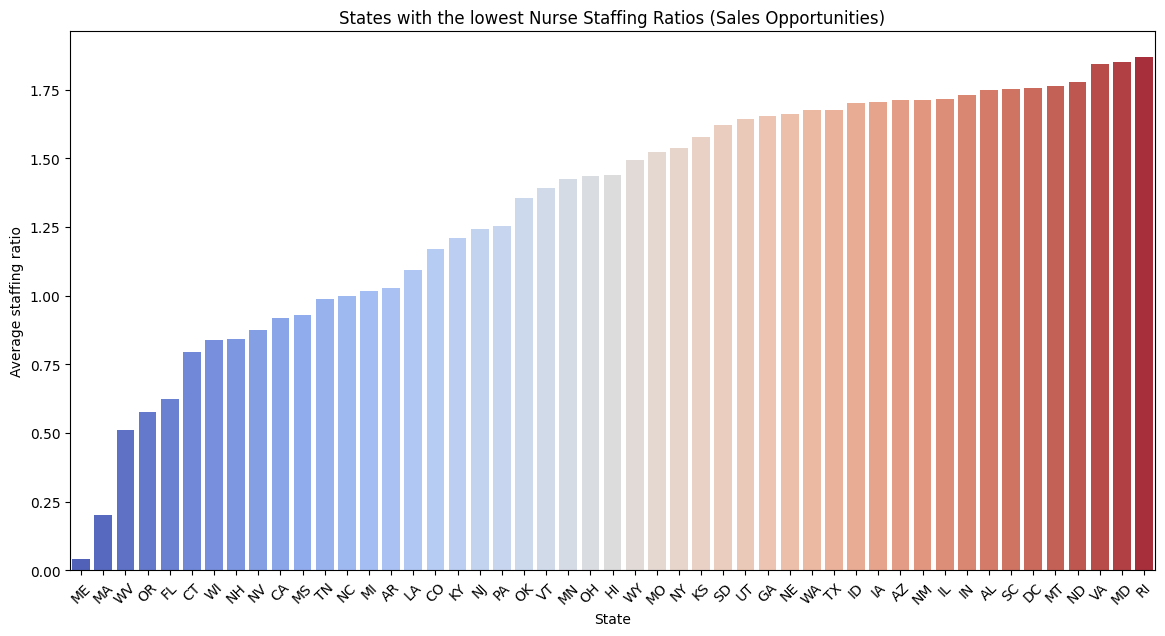

In [14]:
# Staffing shortages - state-level view

plt.figure(figsize=(14,7))
staffing_by_state = low_staffing.groupby('STATE')["Staffing_Ratio"].mean().reset_index()
staffing_by_state = staffing_by_state.sort_values(by="Staffing_Ratio")
staffing_by_state.head(5)

sns.barplot(data=staffing_by_state, x="STATE", y="Staffing_Ratio", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("States with the lowest Nurse Staffing Ratios (Sales Opportunities)")
plt.ylabel("Average staffing ratio")
plt.xlabel("State")
plt.show()

* States like Orlando, Florida, Nevada have lower average staffing ratios
* These are the states where CBH can provide staffing assistance more

Text(0, 0.5, 'Average Contract Nurse Percentage')

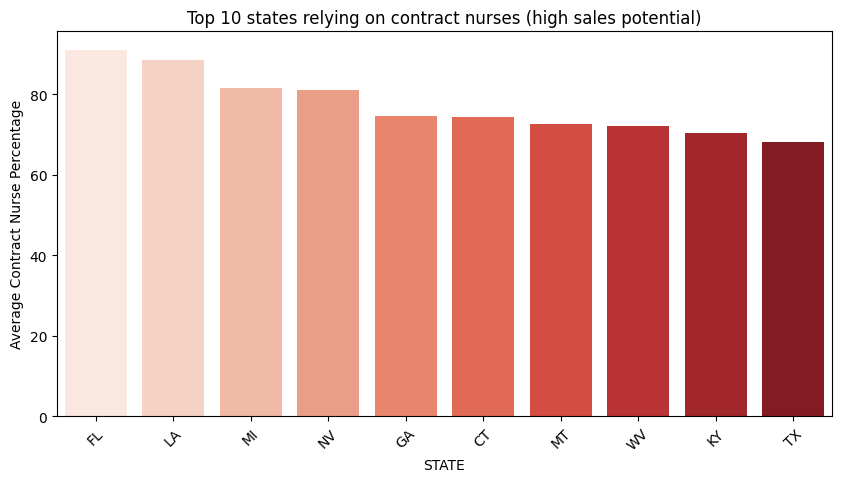

In [15]:
# Contract nurse surge by state
contract_by_state = high_contract_usage.groupby("STATE")["Contract_Nurse_Percentage"].mean().reset_index()
contract_by_state = contract_by_state.sort_values(by="Contract_Nurse_Percentage", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=contract_by_state.head(10), x="STATE", y ="Contract_Nurse_Percentage", palette="Reds")
plt.xticks(rotation=45)
plt.title("Top 10 states relying on contract nurses (high sales potential)")
plt.ylabel("Average Contract Nurse Percentage")

* States like Florida, Los Angeles, Miami etc. are highly relying on the contractual staff
* Discounted deals(after comparing with the competitior providers) can lead to long-term subscribers, thereby setting a concrete projection for the quarterly revenue

# Facilities with critically low RN hours per resident (high urgencies)

In [16]:
pbj["RN_Staffing_Ratio"] = pbj["Hrs_RN"] / pbj["MDScensus"]
critical_rn_shortage = pbj[pbj["RN_Staffing_Ratio"] < 0.5]


print("\n Facilities with critical RN shortages (high urgency):")
print(critical_rn_shortage[["PROVNAME","STATE","RN_Staffing_Ratio"]].head(10))


 Facilities with critical RN shortages (high urgency):
                           PROVNAME STATE  RN_Staffing_Ratio
5          BURNS NURSING HOME, INC.    AL           0.422157
75         BURNS NURSING HOME, INC.    AL           0.490526
91   COOSA VALLEY HEALTHCARE CENTER    AL           0.262346
93   COOSA VALLEY HEALTHCARE CENTER    AL           0.272152
94   COOSA VALLEY HEALTHCARE CENTER    AL           0.490625
95   COOSA VALLEY HEALTHCARE CENTER    AL           0.375000
96   COOSA VALLEY HEALTHCARE CENTER    AL           0.212500
97   COOSA VALLEY HEALTHCARE CENTER    AL           0.474684
99   COOSA VALLEY HEALTHCARE CENTER    AL           0.444805
100  COOSA VALLEY HEALTHCARE CENTER    AL           0.282895


In [17]:
pbj["RN_Staffing_Ratio"] = pbj["Hrs_RN"] / pbj["MDScensus"]
critical_rn_shortage = pbj[pbj["RN_Staffing_Ratio"] < 0.5]

# Arrange facilities in ascending order of RN staffing ratio (lowest first = highest urgency)
critical_rn_shortage_sorted = critical_rn_shortage.sort_values(by="RN_Staffing_Ratio", ascending=True)


print("\nFacilities with critical RN shortages (high urgency):", len(critical_rn_shortage_sorted))
print("\n Facilities with critical RN shortages (high urgency):")
print(critical_rn_shortage_sorted[["PROVNAME","STATE","RN_Staffing_Ratio"]].head(10))


Facilities with critical RN shortages (high urgency): 880292

 Facilities with critical RN shortages (high urgency):
                               PROVNAME STATE  RN_Staffing_Ratio
339017                  CORE OF BEDFORD    IN                0.0
356839   THORNTON TERRACE HEALTH CAMPUS    IN                0.0
1241916     EVERGREEN HEALTHCARE CENTER    TX                0.0
356853   THORNTON TERRACE HEALTH CAMPUS    IN                0.0
1241915     EVERGREEN HEALTHCARE CENTER    TX                0.0
1241914     EVERGREEN HEALTHCARE CENTER    TX                0.0
356867   THORNTON TERRACE HEALTH CAMPUS    IN                0.0
928744      CHOCTAW NATION NURSING HOME    OK                0.0
1241913     EVERGREEN HEALTHCARE CENTER    TX                0.0
1241912     EVERGREEN HEALTHCARE CENTER    TX                0.0


* 

# RN Shortages visualized

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


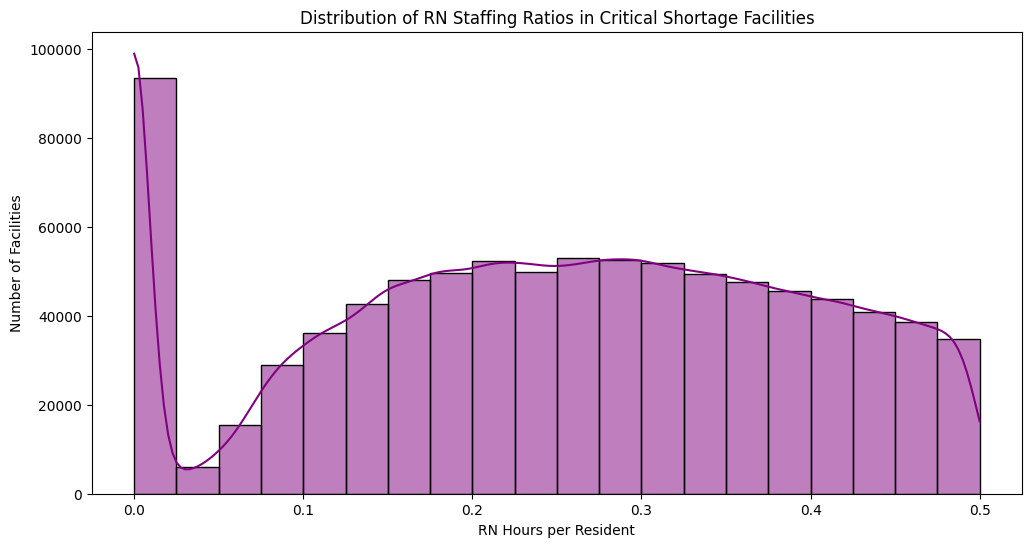

In [18]:
# Visualizing RN shortages
plt.figure(figsize=(12,6))
sns.histplot(critical_rn_shortage["RN_Staffing_Ratio"], bins=20, kde=True, color="purple")
plt.title("Distribution of RN Staffing Ratios in Critical Shortage Facilities")
plt.xlabel("RN Hours per Resident")
plt.ylabel("Number of Facilities")
plt.show()

# High Priority Sales Leads

The following script will generate leads that has either of the ONE condition true from the following: 

Contract Nurse Percentage > 50, Staffing Ratio < 2, and RN Staffing Ratio < 0.5

In [19]:
# Ensure numeric data
pbj["Contract_Nurse_Percentage"] = pd.to_numeric(pbj["Contract_Nurse_Percentage"], errors="coerce")
pbj["Staffing_Ratio"] = pd.to_numeric(pbj["Staffing_Ratio"], errors="coerce")
pbj["RN_Staffing_Ratio"] = pd.to_numeric(pbj["RN_Staffing_Ratio"], errors="coerce")

# Fill missing values if necessary
pbj.fillna({'Contract_Nurse_Percentage': 0, 'Staffing_Ratio': 999, 'RN_Staffing_Ratio': 999}, inplace=True)

# Define high-priority leads condition
high_priority_mask = (
    (pbj["Contract_Nurse_Percentage"] > 50) |
    (pbj["Staffing_Ratio"] < 2) |
    (pbj["RN_Staffing_Ratio"] < 0.5)
)

# Apply filter
high_priority_leads = pbj[high_priority_mask]

# Print debugging info
print("\n High-Priority Sales Leads Count:", len(high_priority_leads))
print(high_priority_leads[['PROVNAME','STATE','Contract_Nurse_Percentage','Staffing_Ratio','RN_Staffing_Ratio']].head(10))



 High-Priority Sales Leads Count: 893087
                           PROVNAME STATE  Contract_Nurse_Percentage  \
5          BURNS NURSING HOME, INC.    AL                        0.0   
75         BURNS NURSING HOME, INC.    AL                        0.0   
91   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
93   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
94   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
95   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
96   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
97   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
99   COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   
100  COOSA VALLEY HEALTHCARE CENTER    AL                        0.0   

     Staffing_Ratio  RN_Staffing_Ratio  
5          3.431765           0.422157  
75         3.180877           0.490526  
91         3.932099           0.262346  
9

In [20]:
# Ensure numeric data
pbj["Contract_Nurse_Percentage"] = pd.to_numeric(pbj["Contract_Nurse_Percentage"], errors="coerce")
pbj["Staffing_Ratio"] = pd.to_numeric(pbj["Staffing_Ratio"], errors="coerce")
pbj["RN_Staffing_Ratio"] = pd.to_numeric(pbj["RN_Staffing_Ratio"], errors="coerce")

# Fill missing values if necessary
pbj.fillna({'Contract_Nurse_Percentage': 0, 'Staffing_Ratio': 999, 'RN_Staffing_Ratio': 999}, inplace=True)

# Define high-priority leads condition
high_priority_mask = (
    (pbj["Contract_Nurse_Percentage"] > 50) &
    (pbj["Staffing_Ratio"] < 2) &
    (pbj["RN_Staffing_Ratio"] < 0.5)
)

# Apply filter
high_priority_leads = pbj[high_priority_mask]

# Print debugging info
print("\n High-Priority Sales Leads Count:", len(high_priority_leads))
print(high_priority_leads[['PROVNAME','STATE','Contract_Nurse_Percentage','Staffing_Ratio','RN_Staffing_Ratio']].head(10))



 High-Priority Sales Leads Count: 2001
                          PROVNAME STATE  Contract_Nurse_Percentage  \
22575  FRIENDSHIP VILLAGE OF TEMPE    AZ                  65.928450   
22576  FRIENDSHIP VILLAGE OF TEMPE    AZ                  75.691279   
22577  FRIENDSHIP VILLAGE OF TEMPE    AZ                  84.526112   
22578  FRIENDSHIP VILLAGE OF TEMPE    AZ                  82.082867   
22579  FRIENDSHIP VILLAGE OF TEMPE    AZ                 100.000000   
22582  FRIENDSHIP VILLAGE OF TEMPE    AZ                  79.220779   
22583  FRIENDSHIP VILLAGE OF TEMPE    AZ                  87.044534   
22584  FRIENDSHIP VILLAGE OF TEMPE    AZ                  74.400000   
22585  FRIENDSHIP VILLAGE OF TEMPE    AZ                  86.013986   
22586  FRIENDSHIP VILLAGE OF TEMPE    AZ                 100.000000   

       Staffing_Ratio  RN_Staffing_Ratio  
22575        0.397966           0.262373  
22576        0.514219           0.389219  
22577        0.847541           0.339344  
22578 


* We identified that the major metrics that will lead concrete sales leads are the Contract Nurse Percentage, Staffing Ratio, and RN Staffing Ratio. * * Upon setting metrics equivalent to these values, Contract Nurse Percentage > 50, Staffing Ratio < 2, and RN Staffing Ratio < 0.5, we get the list of facilities which can be high-priority sales leads.
* There are total 893087 facilities where either Contract Nurse Percentage is greater than 50 or staffing ratio is less than 2 or RN Staffing ratio is less than 0.5.
* There are total 2001 facilities where all three conditions are true i.e., Contract Nurse Percentage is greater than 50, staffing ratio is less than 2 and RN Staffing ratio is less than 0.5.


# Enrolment Growth by State

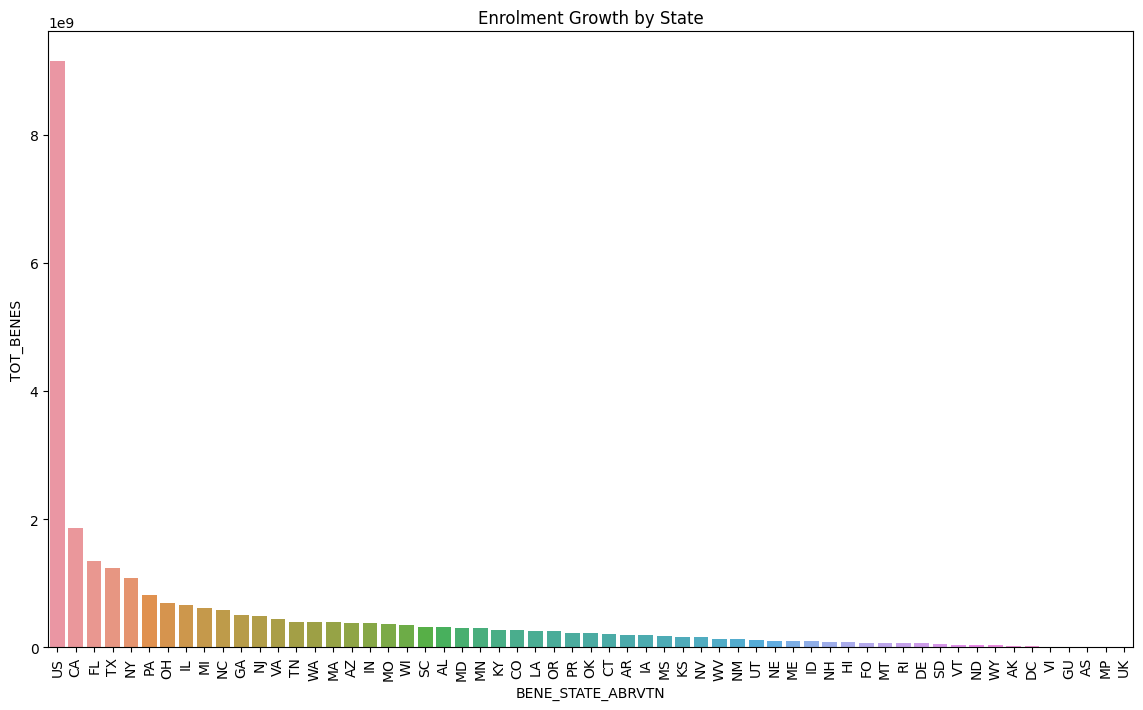

In [21]:
# Convert relevant columns to numeric 
mme['TOT_BENES'] = pd.to_numeric(mme['TOT_BENES'], errors='coerce')
mme['AGE_LT_25_BENES'] = pd.to_numeric(mme['AGE_LT_25_BENES'], errors='coerce')
mme['AGE_25_TO_44_BENES'] = pd.to_numeric(mme['AGE_25_TO_44_BENES'], errors='coerce')

# Group by state and total beneficiaries
state_growth = mme.groupby('BENE_STATE_ABRVTN').agg({'TOT_BENES':'sum'}).reset_index()

# Sort by state with the highest enrollment growth
state_growth = state_growth.sort_values(by='TOT_BENES', ascending=False)

# Visualizing the enrolment growth by state
plt.figure(figsize=(14,8))
sns.barplot(x='BENE_STATE_ABRVTN', y = 'TOT_BENES',data=state_growth)
plt.title("Enrolment Growth by State")
plt.xticks(rotation=90)
plt.show()

* The maximum enrolment is for the "US" as a state in the given dataset
* But, we are still interested to get the state-wise data to gain better insights

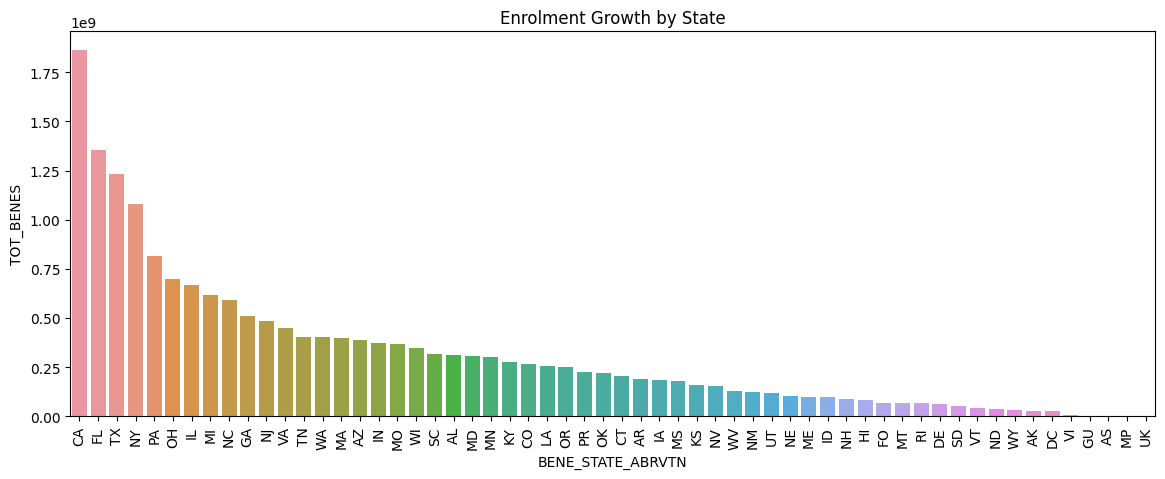

In [22]:

# Convert relevant columns to numeric 
mme['TOT_BENES'] = pd.to_numeric(mme['TOT_BENES'], errors='coerce')
mme['AGE_LT_25_BENES'] = pd.to_numeric(mme['AGE_LT_25_BENES'], errors='coerce')
mme['AGE_25_TO_44_BENES'] = pd.to_numeric(mme['AGE_25_TO_44_BENES'], errors='coerce')

# Group by state and total beneficiaries
state_growth = mme.groupby('BENE_STATE_ABRVTN').agg({'TOT_BENES':'sum'}).reset_index()

# Removing the US in order to get the state specific data
state_growth = state_growth[state_growth["BENE_STATE_ABRVTN"] !="US"]

# Sort by state with the highest enrollment growth
state_growth = state_growth.sort_values(by='TOT_BENES', ascending=False)

# Visualizing the enrolment growth by state
plt.figure(figsize=(14,5))
sns.barplot(x='BENE_STATE_ABRVTN', y = 'TOT_BENES',data=state_growth)
plt.title("Enrolment Growth by State")
plt.xticks(rotation=90)
plt.show()

It was observed through the Medicare enrolment dataset that the maximum enrolment was observed in states like California, Florida, Texas, New York, and Pennsylvania. These can be the states where Clipboard Health can focus on staffing needs in these states

# Machine Learning Models

In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

PBJ Model - Mean Absolutee Error: 1.06
PBJ Model - R^2 Score: 0.98


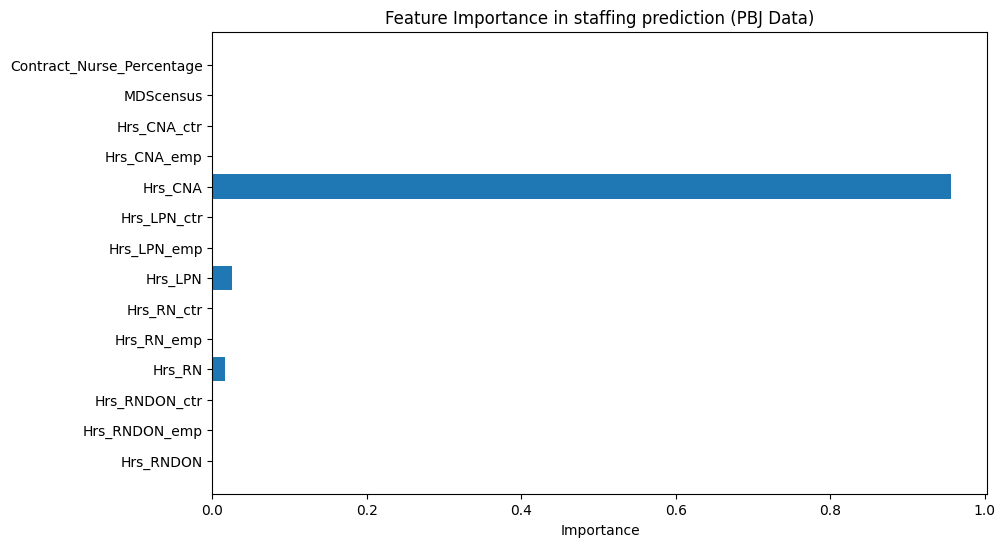

In [24]:
# Prepare the feature set
features = [
    'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr',
    'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr',
    'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr',
    'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr',
    'MDScensus','Contract_Nurse_Percentage'
]

# Target variable: Total Nurse Hours
pbj['Total_Nurse_Hours'] = pbj[['Hrs_RNDON','Hrs_RN', 'Hrs_LPN', 'Hrs_CNA']].sum(axis=1)
target = 'Total_Nurse_Hours'

# Handle missing values by filling with the median
pbj[features] = pbj[features].fillna(pbj[features].median())

# Split into training and test sets 
X = pbj[features]
y = pbj[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_pbj = RandomForestRegressor(n_estimators=100, random_state=42)
model_pbj.fit(X_train, y_train)

# Predict and  evaluate
y_pred_pbj = model_pbj.predict(X_test)
mae_pbj = mean_absolute_error(y_test, y_pred_pbj)
r2_pbj = r2_score(y_test, y_pred_pbj)

print(f"PBJ Model - Mean Absolutee Error: {mae_pbj:.2f}")
print(f"PBJ Model - R^2 Score: {r2_pbj:.2f}")

# Feature importance plot
plt.figure(figsize=(10,6))
plt.barh(features, model_pbj.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importance in staffing prediction (PBJ Data)')
plt.show()

🚀 Interpretation of Results
* The PBJ model performed exceptionally well with:
* Mean Absolute Error (MAE) = 1.06 → Very low error, meaning predictions are highly accurate.
R² Score = 0.98 → The model explains 98% of the variance in Total_Nurse_Hours, making it highly reliable.
📊 Key Insight from Feature Importance
* Since Hrs_CNA (Certified Nursing Assistant Hours) has the highest importance, it means:
* ✅ CNA hours are the biggest driver of total nurse hours in facilities.
* ✅ Facilities with low CNA hours might struggle with staffing, making them high-priority sales leads. 

# Identify facilities with low CNA hours and high contract nurse dependency

In [25]:
low_cna_facilities = pbj[(pbj['Hrs_CNA'] < pbj['Hrs_CNA'].median()) & (pbj['Contract_Nurse_Percentage'] > 50)]

# Show top leads
print("\n High-Priority Sales Leads Count for the facilities with the low CNA staffing:", len(low_cna_facilities))
print(low_cna_facilities[['PROVNAME','STATE','Hrs_CNA','Contract_Nurse_Percentage']].head(10))


 High-Priority Sales Leads Count for the facilities with the low CNA staffing: 13911
                               PROVNAME STATE  Hrs_CNA  \
20660  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   128.64   
20661  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   143.49   
20662  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   144.20   
20674  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   141.53   
20675  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   142.32   
20686  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   143.76   
20689  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   146.02   
20702  PROVIDENCE SEWARD MOUNTAIN HAVEN    AK   136.19   
20922                  WILDFLOWER COURT    AK   138.50   
21210      YUKON KUSKOKWIM ELDER'S HOME    AK    60.35   

       Contract_Nurse_Percentage  
20660                  73.578485  
20661                  61.703767  
20662                  54.397192  
20674                  60.448878  
20675                  52.400952  
20686                  52.123080  
20689                  53.0230

# Predict Future CNA Staffing needs (Trend analysis)

In [26]:
# Predicting CNA staffing needs for all facilities 
pbj['Predicted_Hrs_CNA'] = model_pbj.predict(X)

# Identify facilities at risk (lowest predicted CNA hours)
at_risk_facilities = pbj.sort_values(by='Predicted_Hrs_CNA').head(10)

print("\n Facilities at Risk of the CNA Shortages:")
print(at_risk_facilities[['PROVNAME','STATE','Predicted_Hrs_CNA']])


 Facilities at Risk of the CNA Shortages:
                                             PROVNAME STATE  Predicted_Hrs_CNA
726355                          ST CATHERINE OF SIENA    NJ                0.0
921336                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
921337                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
921338                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
921339                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
926785                     STILWELL NURSING AND REHAB    OK                0.0
921340                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
38471   THE BLOSSOMS AT ROGERS REHAB & NURSING CENTER    AR                0.0
921341                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0
921335                BRENTWOOD EXTENDED CARE & REHAB    OK                0.0


In [27]:
# Aggregate CNA hours by state
cna_state = pbj.groupby('STATE').agg({'Hrs_CNA':'mean'}).reset_index()
cna_state.rename(columns={'Hrs_CNA':'Avg_Hrs_CNA'}, inplace=True)                                      

In [28]:
# Aggregate total Medicare beneficiaries by state
medicare_state = mme.groupby('BENE_STATE_ABRVTN').agg({'TOT_BENES':'sum'}).reset_index()
medicare_state.rename(columns={'BENE_STATE_ABRVTN':'STATE','TOT_BENES':'Total_Beneficiaries'}, inplace=True)

In [29]:
# Merge CNA and Medicare data on STATE
state_analysis = pd.merge(cna_state, medicare_state, on='STATE', how='inner')

# define thresholds
low_cna_threshold = state_analysis['Avg_Hrs_CNA'].quantile(0.25) # Bottom 25% CNA hours
high_medicare_threshold = state_analysis['Total_Beneficiaries'].quantile(0.75) # Top 25% Medicare enrolment

# Identify high-priority states
high_priority_states = state_analysis[
    (state_analysis['Avg_Hrs_CNA'] < low_cna_threshold) &
    (state_analysis['Total_Beneficiaries'] < high_medicare_threshold)
] 

print("\n High-Priority States for Expansion:")
print(high_priority_states.sort_values(by="Total_Beneficiaries", ascending=False))


 High-Priority States for Expansion:
   STATE  Avg_Hrs_CNA  Total_Beneficiaries
15    IN   124.152282          375744247.0
24    MO   110.700954          367403809.0
39    PR     0.000000          226556396.0
36    OK   106.417541          220914702.0
12    IA   108.536633          186932356.0
16    KS    98.499066          159880546.0
45    UT   118.186683          118844312.0
29    NE   106.948832          103361986.0
13    ID   104.271434           98912679.0
26    MT   122.780231           68376421.0
42    SD   108.296499           52323567.0
51    WY   118.021352           32640099.0


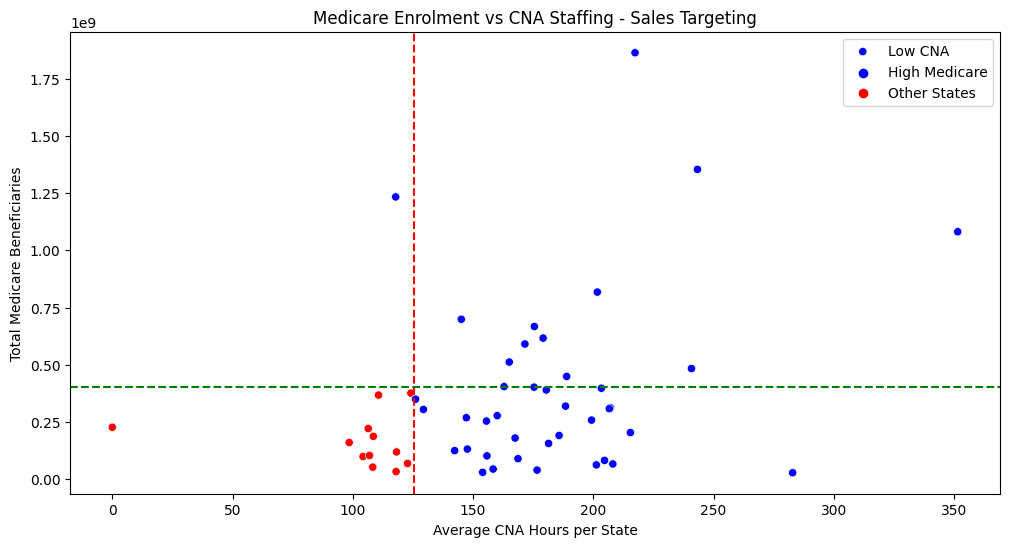

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,6))
sns.scatterplot(data=state_analysis,
                x='Avg_Hrs_CNA',
                y='Total_Beneficiaries',
                hue=(state_analysis['STATE'].isin(high_priority_states['STATE'])),
                palette={True: 'red', False:'blue'})
plt.axvline(low_cna_threshold, color='red', linestyle='--', label="Low CNA Threshold")
plt.axhline(high_medicare_threshold, color='green', linestyle='--', label="High Medicare Threshold")
plt.xlabel("Average CNA Hours per State")
plt.ylabel("Total Medicare Beneficiaries")
plt.title("Medicare Enrolment vs CNA Staffing - Sales Targeting")
plt.legend(["Low CNA","High Medicare", "Other States"])
plt.show()

**Interpretation of the results**

* Red points --> Target states with low CNA staffing + high Medicare enrolment (ideal for sales expansion)
* Blue points --> Other states that don't fit in both the criterias

In [31]:
import pandas as pd

# Save processed Medicare Monthly Enrollment (MME) dataset
mme.to_csv("processed_medicare_enrollment.csv", index=False)

# Save processed Payroll-Based Journal (PBJ) dataset
pbj.to_csv("processed_pbj_staffing.csv", index=False)

print(" Processed datasets saved successfully!")


 Processed datasets saved successfully!


# Conclusion

This analysis has identified high-priority leads with respect to RN Shortages at different facilities, high-growth facilities, high-priority leads with respect to CNA hours, feature dependence through ML model that predicts staffing expansion. We recommend aligning sales efforts with these trends to maximize opportunities. Future steps include refining machine learning models for predictive sales insights and deeper segmentation of provider types.